In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point

In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [18]:
ddcmap = pd.read_csv('C:/Users/unews/nss_data_science/Capstone/district_dcmap.csv')

In [4]:
tn = gpd.read_file('C:/Users/unews/nss_data_science/Capstone/Shape/tl_2010_47_county10.shp')
#tn.plot('myvalues', cmap='OrRd')

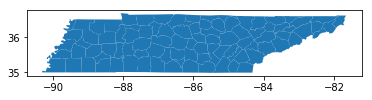

In [104]:
tn.plot()

In [11]:
tn.head()

STATEFP10 COUNTYFP10 COUNTYNS10 GEOID10    NAME10       NAMELSAD10 LSAD10  \
0        47        051   01639744   47051  Franklin  Franklin County     06   
1        47        021   01639731   47021  Cheatham  Cheatham County     06   
2        47        029   01639734   47029     Cocke     Cocke County     06   
3        47        007   01639725   47007   Bledsoe   Bledsoe County     06   
4        47        155   01639789   47155    Sevier    Sevier County     06   

  CLASSFP10 MTFCC10 CSAFP10 CBSAFP10 METDIVFP10 FUNCSTAT10     ALAND10  \
0        H1   G4020    None    46100       None          A  1436257485   
1        H1   G4020     400    34980       None          A   783308267   
2        H1   G4020     314    35460       None          A  1125518964   
3        H1   G4020    None     None       None          A  1052635810   
4        H1   G4020     314    42940       None          A  1534567408   

   AWATER10   INTPTLAT10    INTPTLON10  \
0  54890094  +35.1559259  -086.0992032   
1  11964151  +36.2551800  -087.1008163   
2  22196995  +35.9161984  -083.1192234   
3    838365  +35.5936682  -085.2059790   
4  13514945  +35.7912836  -083.5219545   

                                            geometry  
0  POLYGON ((-86.15281399999999 34.989926, -86.15...  
1  POLYGON ((-87.148602 36.422773, -87.1486709999...  
2  POLYGON ((-83.304716 35.89886, -83.30416799999...  
3  POLYGON ((-85.277034 35.390432, -85.277891 35....  
4  POLYGON ((-83.784379 35.876163, -83.7843819999...

In [48]:
np.sort(tn['NAME10'].unique())

array(['Anderson', 'Bedford', 'Benton', 'Bledsoe', 'Blount', 'Bradley',
       'Campbell', 'Cannon', 'Carroll', 'Carter', 'Cheatham', 'Chester',
       'Claiborne', 'Clay', 'Cocke', 'Coffee', 'Crockett', 'Cumberland',
       'Davidson', 'DeKalb', 'Decatur', 'Dickson', 'Dyer', 'Fayette',
       'Fentress', 'Franklin', 'Gibson', 'Giles', 'Grainger', 'Greene',
       'Grundy', 'Hamblen', 'Hamilton', 'Hancock', 'Hardeman', 'Hardin',
       'Hawkins', 'Haywood', 'Henderson', 'Henry', 'Hickman', 'Houston',
       'Humphreys', 'Jackson', 'Jefferson', 'Johnson', 'Knox', 'Lake',
       'Lauderdale', 'Lawrence', 'Lewis', 'Lincoln', 'Loudon', 'Macon',
       'Madison', 'Marion', 'Marshall', 'Maury', 'McMinn', 'McNairy',
       'Meigs', 'Monroe', 'Montgomery', 'Moore', 'Morgan', 'Obion',
       'Overton', 'Perry', 'Pickett', 'Polk', 'Putnam', 'Rhea', 'Roane',
       'Robertson', 'Rutherford', 'Scott', 'Sequatchie', 'Sevier',
       'Shelby', 'Smith', 'Stewart', 'Sullivan', 'Sumner', 'Tipton',
    

In [38]:
tn.shape

(95, 18)

In [20]:
ddcmap['county']=ddcmap['county'].str.capitalize()

In [23]:
ddcmap  #Carroll Co school district is the only one with 0 chronically absent.

Unnamed: 0                  system_name      county  year  system      subgroup  n_students  n_chronically_absent  n_10_to_20_pct  n_greater_than_20_pct  pct_chronically_absent  pct_10_to_20_pct  pct_greater_than_20_pct licensed_educator instuctional_personnel classroom_teacher principal superintendent
0           143  achievement school district         NaN  2017     985  all students       11436                  3404            2451                    953                    29.8              21.4                      8.3            56,814                 56,814            54,373    91,425        220,000
1           131                        alamo    Crockett  2017     171  all students         570                    34              31                      3                     6.0               5.4                      0.5            45,070                 43,411            42,886    70,003        101,356
2             3                        alcoa      Blount  2017      51  all students        1948                   155             140                     15                     8.0               7.2                      0.8            64,653                 64,502            61,790    99,120        112,567
3            70   alvin c york institute ssd    Fentress  2017     961  all students         584                    85              69                     16                    14.6              11.8                      2.7               NaN                    NaN               NaN       NaN            NaN
4            40                  anderson co    Anderson  2017      10  all students        6331                   761             607                    154                    12.0               9.6                      2.4            49,268                 48,764            46,386    81,234        135,000
5             7                    arlington      Shelby  2017     793  all students        5089                   216             194                     22                     4.2               3.8                      0.4            62,382                 61,307            58,891  1 07,598        157,570
6            21                       athens      Mcminn  2017     541  all students        1535                   108              90                     18                     7.0               5.9                      1.2            59,050                 58,586            55,254    98,858        126,380
7             5                     bartlett      Shelby  2017     794  all students        8710                   746             643                    103                     8.6               7.4                      1.2            60,056                 59,092            56,740  1 09,258        194,400
8            32                   bedford co     Bedford  2017      20  all students        8502                  1088             863                    225                    12.8              10.2                      2.6            47,974                 47,685            45,733    78,245        107,826
9            83                   bells city    Crockett  2017     172  all students         360                    16              16                      0                     4.4               4.4                      0.0            48,652                 48,652            46,747    56,399         76,000
10           82                    benton co      Benton  2017      30  all students        2123                   192             167                     25                     9.0               7.9                      1.2            48,233                 48,032            45,908    64,938         89,207
11           52                   bledsoe co     Bledsoe  2017      40  all students        1681                   279             227                     52                    16.6              13.5                      3.1            51,766                 51,268            48,781    69,205    

In [90]:
ddcmap['classroom_teacher']=ddcmap['classroom_teacher'].str.replace(",","")
ddcmap['classroom_teacher']=pd.to_numeric(ddcmap['classroom_teacher'])

In [127]:
ddcmap['principal']=ddcmap['principal'].str.replace(" ", "")
ddcmap['principal']=ddcmap['principal'].str.replace(",","")

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [31]:
group_dc=ddcmap.groupby(['county', 'system_name'])['pct_chronically_absent'].mean()

In [34]:
group_co=pd.DataFrame(ddcmap.groupby(['county'])['pct_chronically_absent'].mean())
grou

In [44]:
group_co

pct_chronically_absent
county                            
Anderson                 11.066667
Bedford                  12.800000
Benton                    9.000000
Bledsoe                  16.600000
Blount                    7.100000
Bradley                  11.100000
Campbell                 21.600000
Cannon                   14.500000
Carroll                   6.833333
Carter                   19.050000
Cheatham                 14.100000
Chester                  16.000000
Claiborne                22.900000
Clay                      9.000000
Cocke                    15.100000
Coffee                   12.366667
Crockett                  4.933333
Cumberland               12.300000
Davidson                 16.900000
Decatur                  19.600000
Dekalb                   10.900000
Dickson                  10.800000
Dyer                      9.750000
Fayette                  13.500000
Fentress                 13.650000
Franklin                 14.400000
Gibson                    9.880000
Giles                    10.600000
Grainger                 36.200000
Greene                    8.450000
Grundy                   11.900000
Hamblen                   6.700000
Hamilton                  8.900000
Hancock                  16.500000
Hardeman                 13.400000
Hardin                   15.800000
Hawkins                  14.350000
Haywood                   9.700000
Henderson                12.100000
Henry                    10.600000
Hickman                  13.100000
Houston                  39.400000
Humphreys                14.400000
Jackson                   9.900000
Jefferson                13.200000
Johnson                   8.700000
Knox                     14.900000
Lake                     19.900000
Lauderdale                9.800000
Lawrence                  8.300000
Lewis                    11.000000
Lincoln                  13.500000
Loudon                   13.100000
Macon                    10.800000
Madison                  21.500000
Marion                   24.500000
Marshall                 15.300000
Maury                    12.600000
Mcminn                   13.200000
Mcnairy                   9.500000
Meigs                    12.000000
Monroe                   14.250000
Montgomery                8.500000
Moore                    13.600000
Morgan                    8.800000
Obion                    12.250000
Overton                  11.000000
Perry                    11.000000
Pickett                  15.600000
Polk                     14.700000
Putnam                   10.000000
Rhea                     11.600000
Roane                    13.000000
Robertson                 7.400000
Rutherford                8.700000
Scott                     8.650000
Sequatchie               19.200000
Sevier                   20.600000
Shelby                    8.500000
Smith                     5.000000
Stewart                  15.100000
Sullivan                 14.466667
Sumner                    9.500000
Tipton                    9.700000
Trousdale                10.200000
Unicoi                   20.800000
Union                    17.400000
Van buren                10.100000
Warren                   14.200000
Washington               13.600000
Wayne                    17.300000
Weakley                  11.900000
White                     9.000000
Williamson                5.600000
Wilson                    9.500000

In [54]:
group_co.shapen

(95, 1)

In [ ]:
tn.NAME10 = tn.NAME10.str.capitalize() # fixes mismatches before merge

In [230]:
pct_man=ddcmap.groupby('county')['n_students','n_chronically_absent'].sum()

In [231]:
pct_man.head()

n_students  n_chronically_absent
county                                    
Anderson       11621                  1432
Bedford         8502                  1088
Benton          2123                   192
Bledsoe         1681                   279
Blount         17779                  1338

In [233]:
pct_man.sort_values(by = 'pct', ascending = False)

n_students  n_chronically_absent       pct
county                                                
Houston           1329                   523  0.393529
Grainger          3376                  1223  0.362263
Claiborne         4219                   967  0.229201
Carter            7681                  1686  0.219503
Campbell          5456                  1178  0.215909
Madison          12480                  2688  0.215385
Unicoi            2279                   474  0.207986
Sevier           14373                  2956  0.205663
Lake               772                   154  0.199482
Decatur           1569                   307  0.195666
Marion            4245                   828  0.195053
Sequatchie        2204                   424  0.192377
Union             3517                   611  0.173728
Wayne             2141                   370  0.172816
Davidson         82312                 13931  0.169246
Cocke             5127                   866  0.168910
Bledsoe           1681                   279  0.165973
Hancock            972                   160  0.164609
Chester           2846                   454  0.159522
Hardin            3433                   541  0.157588
Pickett            693                   108  0.155844
Marshall          5341                   818  0.153155
Stewart           1983                   300  0.151286
Sullivan         20940                  3163  0.151051
Knox             58691                  8767  0.149376
Monroe            6787                  1011  0.148961
Polk              2299                   338  0.147020
Shelby          137300                 20038  0.145943
Cannon            1894                   275  0.145195
Humphreys         2842                   410  0.144265
Franklin          5309                   764  0.143907
Warren            6469                   920  0.142217
Cheatham          6232                   881  0.141367
Rhea              5089                   712  0.139910
Hawkins           7328                  1015  0.138510
Mcminn            7416                  1025  0.138215
Washington       16232                  2230  0.137383
Moore              839                   114  0.135876
Fayette           3282                   444  0.135283
Lincoln           3767                   507  0.134590
Hardeman          3522                   473  0.134299
Obion             4909                   657  0.133836
Jefferson         7105                   938  0.132020
Hickman           3272                   430  0.131418
Fentress          2652                   347  0.130845
Henderson         4689                   610  0.130092
Roane             6517                   846  0.129814
Bedford           8502                  1088  0.127970
Coffee            9013                  1138  0.126262
Maury            12228                  1535  0.125532
Anderson         11621                  1432  0.123225
Cumberland        7172                   883  0.123118
Meigs             1663                   199  0.119663
Weakley           4136                   493  0.119197
Loudon            6869                   818  0.119086
Grundy            2046                   243  0.118768
Bradley          15269                  1704  0.111599
Wilson           21242                  2355  0.110865
Overton           3014                   333  0.110484
Perry             1039                   114  0.109721
Lewis             3024                   331  0.109458
Dekalb            2870                   313  0.109059
Macon             3828                   415  0.108412
Dickson           8256                   894  0.108285
Giles             3799                   401  0.105554
Henry             4565                   478  0.104710
Trousdale         1259                   129  0.102462
Van buren          701                    71  0.101284
Rutherford       51769                  5237  0.101161
Putnam           10948                  1098  0.100292
Jackson           1444                   143  0.0990

In [232]:
pct_man['pct'] = pct_man.n_chronically_absent/pct_man.n_students

In [68]:
tn_abs1=pd.merge(group_co,tn,how = 'outer', left_on='county', right_on='NAME10')

In [52]:
ck.shape

(95, 19)

In [69]:
tn_abs2=pd.merge(ck,pct_man, left_on = 'NAME10', right_on='county' )

In [70]:
(tn_abs2['pct']*100).round() == tn_abs2['pct_chronically_absent'].round() # Spoke with Mary... using calculated pct may be more accurate

0     False
1      True
2      True
3      True
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12     True
13     True
14    False
15    False
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24    False
25     True
26    False
27     True
28     True
29    False
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38    False
39    False
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51    False
52    False
53     True
54     True
55    False
56     True
57     True
58    False
59    False
60     True
61    False
62    False
63     True
64     True
65    False
66     True
67     True
68     True
69     True
70     True
71    False
72     True
73     True
74    False
75    False
76     True
77     True
78    False
79     True
80     True
81    False
82    False
83  

In [71]:
tn_abs2

pct_chronically_absent STATEFP10 COUNTYFP10 COUNTYNS10 GEOID10      NAME10         NAMELSAD10 LSAD10 CLASSFP10 MTFCC10 CSAFP10 CBSAFP10 METDIVFP10 FUNCSTAT10     ALAND10   AWATER10   INTPTLAT10    INTPTLON10                                           geometry  n_students  n_chronically_absent       pct
0                11.066667        47        001   01639722   47001    Anderson    Anderson County     06        H1   G4020     314    28940       None          A   873245292   19771988  +36.1167307  -084.1954177  POLYGON ((-84.33464599999999 36.0302, -84.3346...       11621                  1432  0.123225
1                12.800000        47        003   01639723   47003     Bedford     Bedford County     06        H1   G4020    None    43180       None          A  1226710123    2983154  +35.5136604  -086.4582939  POLYGON ((-86.499674 35.359984, -86.499798 35....        8502                  1088  0.127970
2                 9.000000        47        005   01639724   47005      Benton      Benton County     06        H1   G4020    None     None       None          A  1020822586  109009079  +36.0692530  -088.0712118  POLYGON ((-87.95178799999999 36.225321, -87.95...        2123                   192  0.090438
3                16.600000        47        007   01639725   47007     Bledsoe     Bledsoe County     06        H1   G4020    None     None       None          A  1052635810     838365  +35.5936682  -085.2059790  POLYGON ((-85.277034 35.390432, -85.277891 35....        1681                   279  0.165973
4                 7.100000        47        009   01639726   47009      Blount      Blount County     06        H1   G4020     314    28940       None          A  1447041818   20307831  +35.6881849  -083.9229731  POLYGON ((-84.14251999999999 35.796954, -84.14...       17779                  1338  0.075257
5                11.100000        47        011   01639727   47011     Bradley     Bradley County     06        H1   G4020     174    17420       None          A   851489045    6959355  +35.1539144  -084.8594137  POLYGON ((-85.008478 35.09269, -85.00911099999...       15269                  1704  0.111599
6                21.600000        47        013   01639728   47013    Campbell    Campbell County     06        H1   G4020     314    29220       None          A  1243689525   46503453  +36.4015922  -084.1592495  POLYGON ((-84.323469 36.395527, -84.3243509999...        5456                  1178  0.215909
7                14.500000        47        015   01648572   47015      Cannon      Cannon County     06        H1   G4020     400    34980       None          A   687991703     156872  +35.8083940  -086.0624044  POLYGON ((-85.890631 35.852794, -85.8906909999...        1894                   275  0.145195
8                 6.833333        47        017   01639729   47017     Carroll     Carroll County     06        H1   G4020    None     None       None          A  1552055889    2144122  +35.9678963  -088.4516591  POLYGON ((-88.43844199999999 36.149538, -88.43...        4519                   340  0.075238
9                19.050000        47        019   01639730   47019      Carter      Carter County     06        H1   G4020     304    27740       None          A   883711484   16656931  +36.2847441  -082.1265932  POLYGON ((-82.05894599999999 36.367415, -82.05...        7681                  1686  0.219503
10               14.100000        47        021   01639731   47021    Cheatham    Cheatham County     06        H1   G4020     400    34980       None          A   783308267   11964151  +36.2551800  -087.1008163  POLYGON ((-87.148602 36.422773, -87.1486709999...        6232                   881  0.141367
11               16.000000        47        023   01639732   47023     Chester     Chester County     06        H1   G4020     297    27180       None          A   740052043     575590  +35.4166392  -088.6055046  POLYGON ((-88.761264 35.451615, -88.7605559999...        2846                   454  0.159522
12           

In [234]:
pct_man_idx = pct_man.reset_index()

In [235]:
merged = tn.set_index('NAME10').join(pct_man_idx.set_index('county'))

In [236]:
merged.columns

Index(['STATEFP10', 'COUNTYFP10', 'COUNTYNS10', 'GEOID10', 'NAMELSAD10', 'LSAD10', 'CLASSFP10', 'MTFCC10', 'CSAFP10', 'CBSAFP10', 'METDIVFP10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry', 'n_students', 'n_chronically_absent', 'pct'], dtype='object')

In [237]:
merged['percentage_abs'] = round((merged.pct)*100,2)

In [227]:
#merged['pct']=round((merged.pct*100),2)

In [238]:
type(merged['percentage_abs'][4])

numpy.float64

In [218]:
type(merged['percentage_abs2'][4])

str

In [213]:
merged['percentage_abs2'] = round((merged.pct)*100,2).astype(str)

In [204]:
merged.head()

STATEFP10 COUNTYFP10 COUNTYNS10 GEOID10       NAMELSAD10 LSAD10 CLASSFP10 MTFCC10 CSAFP10 CBSAFP10 METDIVFP10 FUNCSTAT10     ALAND10  AWATER10   INTPTLAT10    INTPTLON10                                           geometry  n_students  n_chronically_absent       pct percentage_abs
NAME10                                                                                                                                                                                                                                                                                          
Franklin        47        051   01639744   47051  Franklin County     06        H1   G4020    None    46100       None          A  1436257485  54890094  +35.1559259  -086.0992032  POLYGON ((-86.15281399999999 34.989926, -86.15...        5309                   764  0.143907          14.39
Cheatham        47        021   01639731   47021  Cheatham County     06        H1   G4020     400    34980       None          A   783308267  11964151  +36.2551800  -087.1008163  POLYGON ((-87.148602 36.422773, -87.1486709999...        6232                   881  0.141367          14.14
Cocke           47        029   01639734   47029     Cocke County     06        H1   G4020     314    35460       None          A  1125518964  22196995  +35.9161984  -083.1192234  POLYGON ((-83.304716 35.89886, -83.30416799999...        5127                   866  0.168910          16.89
Bledsoe         47        007   01639725   47007   Bledsoe County     06        H1   G4020    None     None       None          A  1052635810    838365  +35.5936682  -085.2059790  POLYGON ((-85.277034 35.390432, -85.277891 35....        1681                   279  0.165973           16.6
Sevier          47        155   01639789   47155    Sevier County     06        H1   G4020     314    42940       None          A  1534567408  13514945  +35.7912836  -083.5219545  POLYGON ((-83.784379 35.876163, -83.7843819999...       14373                  2956  0.205663          20.57

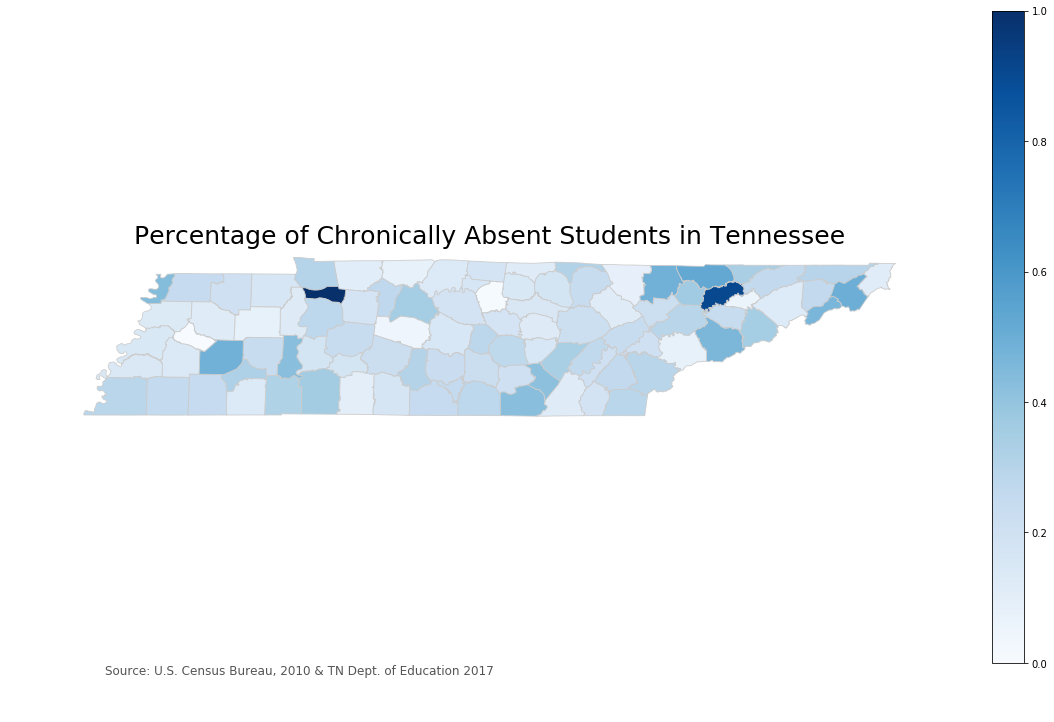

In [161]:
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='pct', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Percentage of Chronically Absent Students in Tennessee', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source

ax.annotate('Source: U.S. Census Bureau, 2010 & TN Dept. of Education 2017',xy=(0.1, .08),  xycoords= 'figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color= '#555555')

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)

In [162]:
import json

#Read data to json.
merged_json = json.loads(merged.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [240]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest percentage.???
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1)

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
#p = figure(title = 'Percentage of Students Chronically Absent, 2016-2017', plot_height = 400 , plot_width = 950, toolbar_location = None)
#p.xgrid.grid_line_color = None
#p.ygrid.grid_line_color = None

#Add hover tool
hover = HoverTool(tooltips = [ ('County','@NAMELSAD10'),('% chronically absent','@pct')])

#Create figure object.
p = figure(title = 'Percentage of Chronically Absent Students, 2016-2017', plot_height = 400 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'pct', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

In [97]:
salary_tp=ddcmap.groupby('county')['classroom_teacher','principal'].median() #Median... attempted to avoid extreme outliers if present

In [99]:
tn_as=pd.merge(tn_abs2,salary_tp, left_on = 'NAME10', right_on='county') #tn_absence,salary... salary is based on median to avoid outliers

In [107]:
health17tn = pd.read_csv('C:/Users/unews/nss_data_science/Capstone/Outcomes and Factor Rankings Data 1719.csv')

In [110]:
health17tn.columns = ('FIPS', 'State', 'County', 'Health Outcomes Z-score', 'Health Outcomes Rank', 'Health Factors Z-score', 'Health Factors Rank', '')

FIPS      State    County Health Outcomes Z-score Health Outcomes Rank Health Factors Z-score Health Factors Rank    
0   FIPS      State    County                 Z-Score                 Rank                Z-Score                Rank NaN
1  47000  Tennessee       NaN                     NaN                  NaN                    NaN                 NaN NaN
2  47001  Tennessee  Anderson                   -0.35                   32                  -0.43                  14 NaN
3  47003  Tennessee   Bedford                   -0.14                   38                   0.13                  61 NaN
4  47005  Tennessee    Benton                    0.85                   83                   0.45                  85 NaN

In [111]:
health17tn

FIPS      State      County Health Outcomes Z-score Health Outcomes Rank Health Factors Z-score Health Factors Rank    
0    FIPS      State      County                 Z-Score                 Rank                Z-Score                Rank NaN
1   47000  Tennessee         NaN                     NaN                  NaN                    NaN                 NaN NaN
2   47001  Tennessee    Anderson                   -0.35                   32                  -0.43                  14 NaN
3   47003  Tennessee     Bedford                   -0.14                   38                   0.13                  61 NaN
4   47005  Tennessee      Benton                    0.85                   83                   0.45                  85 NaN
5   47007  Tennessee     Bledsoe                   -0.84                   12                   0.88                  93 NaN
6   47009  Tennessee      Blount                   -1.05                    7                  -0.61                   9 NaN
7   47011  Tennessee     Bradley                   -0.64                   18                  -0.13                  31 NaN
8   47013  Tennessee    Campbell                    1.33                   91                   0.51                  86 NaN
9   47015  Tennessee      Cannon                    0.07                   49                  -0.07                  36 NaN
10  47017  Tennessee     Carroll                    0.22                   61                  -0.01                  45 NaN
11  47019  Tennessee      Carter                    0.05                   48                   0.19                  70 NaN
12  47021  Tennessee    Cheatham                   -0.49                   23                  -0.42                  15 NaN
13  47023  Tennessee     Chester                   -1.37                    6                  -0.22                  25 NaN
14  47025  Tennessee   Claiborne                    0.54                   73                   0.10                  57 NaN
15  47027  Tennessee        Clay                    2.11                   95                   0.38                  78 NaN
16  47029  Tennessee       Cocke                    1.39                   92                   0.54                  87 NaN
17  47031  Tennessee      Coffee                   -0.02                   45                  -0.12                  33 NaN
18  47033  Tennessee    Crockett                   -0.45                   26                   0.18                  67 NaN
19  47035  Tennessee  Cumberland                   -0.41                   29                  -0.21                  27 NaN
20  47037  Tennessee    Davidson                   -0.95                   11                  -0.22                  26 NaN
21  47039  Tennessee     Decatur                   -0.17                   36                   0.07                  51 NaN
22  47041  Tennessee      DeKalb                    0.59                   75                   0.18                  68 NaN
23  47043  Tennessee     Dickson                   -0.13                   39                  -0.33                  21 NaN
24  47045  Tennessee        Dyer                    0.58                   74                   0.24                  71 NaN
25  47047  Tennessee     Fayette                   -1.02                    9                  -0.35                  19 NaN
26  47049  Tennessee    Fentress                    0.59                   76                   0.14                  62 NaN
27  47051  Tennessee    Franklin                   -0.43                   27                  -0.33                  20 NaN
28  47053  Tennessee      Gibson                    0.42                   69                  -0.02                  43 NaN
29  47055  Tennessee       Giles                    0.13                   56                  -0.02                  44 NaN
30  47057  Tennessee    Grainger                    0.28                   64                  -0.07                  38 NaN
31  4

In [113]:
health17subranks = pd.read_csv('C:/Users/unews/nss_data_science/Capstone/Outcomes and Factor Subrankings Data 1719.csv')

In [115]:
health17subranks.columns = ('FIPS', 'State', 'County', 'Length of Life Z-score', 'Length of Life Rank', ' Quality of Life Z-score', 'Quality of Life Rank', 'Health Behaviors Z-Score', 'Health Behaviors Rank', ' Clinical Care Z-score', 'Clinical Care Rank', 'Social & Economic Factors Z-score', 'Social & Economic Factors Rank', 'Physical Environment Z-score', 'Physical Environment Rank', '')

In [116]:
health17subranks.head()

FIPS      State    County Length of Life Z-score Length of Life Rank  Quality of Life Z-score Quality of Life Rank Health Behaviors Z-Score Health Behaviors Rank  Clinical Care Z-score Clinical Care Rank Social & Economic Factors Z-score Social & Economic Factors Rank Physical Environment Z-score Physical Environment Rank    
0   FIPS      State    County                Z-Score                Rank                  Z-Score                 Rank                  Z-Score                  Rank                Z-Score               Rank                           Z-Score                           Rank                      Z-Score                      Rank NaN
1  47000  Tennessee       NaN                    NaN                 NaN                      NaN                  NaN                      NaN                   NaN                    NaN                NaN                               NaN                            NaN                          NaN                       NaN NaN
2  47001  Tennessee  Anderson                  -0.20                  30                    -0.15                   30                    -0.11                    19                  -0.22                  7                             -0.10                             31                         0.01                        57 NaN
3  47003  Tennessee   Bedford                  -0.14                  34                    -0.01                   46                     0.03                    56                   0.06                 67                             -0.03                             42                         0.06                        86 NaN
4  47005  Tennessee    Benton                   0.70                  86                     0.15                   65                     0.10                    74                   0.11                 81                              0.23                             81                         0.01                        59 NaN

In [118]:
disparaties17 = pd.read_csv('C:/Users/unews/nss_data_science/Capstone/Ranked Measure Data 1719.csv')
more_disparaties17 = pd.read_csv('C:/Users/unews/nss_data_science/Capstone/Additional Data Measures 1719.csv')

In [124]:
disparaties17['Unnamed: 2'] = disparaties17['Unnamed: 2'].str.capitalize()

In [126]:
more_disparaties17['Unnamed: 2'] = more_disparaties17['Unnamed: 2'].str.capitalize()
health17tn['County'] = health17tn['County'].str.capitalize()
health17subranks['County'] = health17subranks['County'].str.capitalize()

In [129]:
abs_health=pd.merge(pct_man,health17tn, left_on = 'county', right_on='County')

In [130]:
abs_health2=pd.merge(pct_man,health17subranks, left_on = 'county', right_on='County')

In [131]:
abs_health3=pd.merge(pct_man,disparaties17, left_on = 'county', right_on='Unnamed: 2')

In [132]:
abs_health4=pd.merge(pct_man,more_disparaties17, left_on = 'county', right_on='Unnamed: 2')

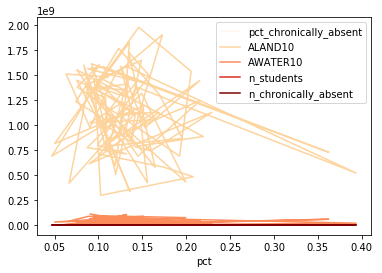

In [140]:
tn_abs2.plot('pct', cmap='OrRd')